<a href="https://colab.research.google.com/github/rbauza7/Tarea-1-Tratamientos-de-datos-Mineria-UTM/blob/main/Tarea_1_MineriaBauzaR_ajustada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 1: Preprocesamiento de datos**

**Roberto Bauza Fermín CC 0962108650**

**Propósito:** Introducir a los estudiantes al manejo y limpieza de datos. Desarrollar habilidades para identificar datos faltantes, valores atípicos y escalado de variables, fundamentales para el modelado.

**Acondicionamiento del ambiente y exportación de archvivo a emplear**

In [1]:
# Instalar R
!apt-get install -y r-base
# Instalar IRKernel para usar R en Google Colab
!R -e "install.packages('IRkernel'); IRkernel::installspec(user = FALSE)"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('IRkernel'); IRkernel::installspec(user = FALSE)
Installing package into ‘/usr/local

**Librerias necesarias**

In [1]:
install.packages("tidyverse") # Para manejo de datos
install.packages("ggplot2")   # Para visualización
install.packages("data.table") # Para trabajar con grandes conjuntos de datos
install.packages("DMwR")      # Para imputación
install.packages("factoextra") # Para análisis multivariante


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘DMwR’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcom

**Enlace del archivo a GitHUb**

In [2]:
# URL del archivo en GitHub
url <- "https://github.com/rbauza7/Tarea-1-Tratamientos-de-datos-Mineria-UTM/raw/refs/heads/main/ev_charging_patterns.csv"

# Descargar y leer el archivo como un data frame
datos <- read.csv(url)

# Mostrar las primeras filas para verificar
head(datos)

# Ver la estructura de los datos
str(datos)


,User.ID,Vehicle.Model,Battery.Capacity..kWh.,Charging.Station.ID,Charging.Station.Location,Charging.Start.Time,Charging.End.Time,Energy.Consumed..kWh.,Charging.Duration..hours.,Charging.Rate..kW.,Charging.Cost..USD.,Time.of.Day,Day.of.Week,State.of.Charge..Start...,State.of.Charge..End...,Distance.Driven..since.last.charge...km.,Temperature...C.,Vehicle.Age..years.,Charger.Type,User.Type
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,User_1,BMW i3,108.463,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.71235,0.5913634,36.38918,13.08772,Evening,Tuesday,29.371576,86.11996,293.60211,27.947953,2,DC Fast Charger,Commuter
2,User_2,Hyundai Kona,100.000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.33928,3.1336521,30.67773,21.12845,Morning,Monday,10.115778,84.66434,112.11280,14.311026,3,Level 1,Casual Driver
3,User_3,Chevy Bolt,75.000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.12888,2.4526527,27.51359,35.66727,Morning,Thursday,6.854604,69.91762,71.79925,21.002002,2,Level 2,Commuter
4,User_4,Hyundai Kona,50.000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.45782,1.2664308,32.88287,13.03624,Evening,Saturday,83.120003,99.62433,199.57778,38.316313,1,Level 1,Long-Distance Traveler
5,User_5,Hyundai Kona,50.000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.62910,2.0197651,10.21571,10.16147,Morning,Saturday,54.258950,63.74379,203.66185,-7.834199,1,Level 1,Long-Distance Traveler
6,User_6,Nissan Leaf,50.000,Station_335,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,43.18114,1.1676402,14.33452,36.90034,Evening,Saturday,75.217748,71.98229,143.68005,-5.274218,0,DC Fast Charger,Long-Distance Traveler


'data.frame':	1320 obs. of  20 variables:
 $ User.ID                                 : chr  "User_1" "User_2" "User_3" "User_4" ...
 $ Vehicle.Model                           : chr  "BMW i3" "Hyundai Kona" "Chevy Bolt" "Hyundai Kona" ...
 $ Battery.Capacity..kWh.                  : num  108 100 75 50 50 ...
 $ Charging.Station.ID                     : chr  "Station_391" "Station_428" "Station_181" "Station_327" ...
 $ Charging.Station.Location               : chr  "Houston" "San Francisco" "San Francisco" "Houston" ...
 $ Charging.Start.Time                     : chr  "2024-01-01 00:00:00" "2024-01-01 01:00:00" "2024-01-01 02:00:00" "2024-01-01 03:00:00" ...
 $ Charging.End.Time                       : chr  "2024-01-01 00:39:00" "2024-01-01 03:01:00" "2024-01-01 04:48:00" "2024-01-01 06:42:00" ...
 $ Energy.Consumed..kWh.                   : num  60.7 12.3 19.1 79.5 19.6 ...
 $ Charging.Duration..hours.               : num  0.591 3.134 2.453 1.266 2.02 ...
 $ Charging.Rate..kW.        

**Parte 1** Realizar un análisis exploratorio de datos, con las funciones, dim(), str(), describe(), hist(), bartplot(), pie().

In [3]:
dim(datos)          # Dimensiones del dataset
str(datos)          # Estructura de las variables
summary(datos)      # Resumen estadístico
colnames(datos)     # Nombres de las columnas
head(datos)         # Primeras filas


[1] 1320   20

'data.frame':	1320 obs. of  20 variables:
 $ User.ID                                 : chr  "User_1" "User_2" "User_3" "User_4" ...
 $ Vehicle.Model                           : chr  "BMW i3" "Hyundai Kona" "Chevy Bolt" "Hyundai Kona" ...
 $ Battery.Capacity..kWh.                  : num  108 100 75 50 50 ...
 $ Charging.Station.ID                     : chr  "Station_391" "Station_428" "Station_181" "Station_327" ...
 $ Charging.Station.Location               : chr  "Houston" "San Francisco" "San Francisco" "Houston" ...
 $ Charging.Start.Time                     : chr  "2024-01-01 00:00:00" "2024-01-01 01:00:00" "2024-01-01 02:00:00" "2024-01-01 03:00:00" ...
 $ Charging.End.Time                       : chr  "2024-01-01 00:39:00" "2024-01-01 03:01:00" "2024-01-01 04:48:00" "2024-01-01 06:42:00" ...
 $ Energy.Consumed..kWh.                   : num  60.7 12.3 19.1 79.5 19.6 ...
 $ Charging.Duration..hours.               : num  0.591 3.134 2.453 1.266 2.02 ...
 $ Charging.Rate..kW.        

   User.ID          Vehicle.Model      Battery.Capacity..kWh.
 Length:1320        Length:1320        Min.   :  1.533       
 Class :character   Class :character   1st Qu.: 62.000       
 Mode  :character   Mode  :character   Median : 75.000       
                                       Mean   : 74.535       
                                       3rd Qu.: 85.000       
                                       Max.   :193.003       
                                                             
 Charging.Station.ID Charging.Station.Location Charging.Start.Time
 Length:1320         Length:1320               Length:1320        
 Class :character    Class :character          Class :character   
 Mode  :character    Mode  :character          Mode  :character   
                                                                  
                                                                  
                                                                  
                                   

[1] "User.ID"                                 
 [2] "Vehicle.Model"                           
 [3] "Battery.Capacity..kWh."                  
 [4] "Charging.Station.ID"                     
 [5] "Charging.Station.Location"               
 [6] "Charging.Start.Time"                     
 [7] "Charging.End.Time"                       
 [8] "Energy.Consumed..kWh."                   
 [9] "Charging.Duration..hours."               
[10] "Charging.Rate..kW."                      
[11] "Charging.Cost..USD."                     
[12] "Time.of.Day"                             
[13] "Day.of.Week"                             
[14] "State.of.Charge..Start..."               
[15] "State.of.Charge..End..."                 
[16] "Distance.Driven..since.last.charge...km."
[17] "Temperature...C."                        
[18] "Vehicle.Age..years."                     
[19] "Charger.Type"                            
[20] "User.Type"

,User.ID,Vehicle.Model,Battery.Capacity..kWh.,Charging.Station.ID,Charging.Station.Location,Charging.Start.Time,Charging.End.Time,Energy.Consumed..kWh.,Charging.Duration..hours.,Charging.Rate..kW.,Charging.Cost..USD.,Time.of.Day,Day.of.Week,State.of.Charge..Start...,State.of.Charge..End...,Distance.Driven..since.last.charge...km.,Temperature...C.,Vehicle.Age..years.,Charger.Type,User.Type
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,User_1,BMW i3,108.463,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.71235,0.5913634,36.38918,13.08772,Evening,Tuesday,29.371576,86.11996,293.60211,27.947953,2,DC Fast Charger,Commuter
2,User_2,Hyundai Kona,100.000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.33928,3.1336521,30.67773,21.12845,Morning,Monday,10.115778,84.66434,112.11280,14.311026,3,Level 1,Casual Driver
3,User_3,Chevy Bolt,75.000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.12888,2.4526527,27.51359,35.66727,Morning,Thursday,6.854604,69.91762,71.79925,21.002002,2,Level 2,Commuter
4,User_4,Hyundai Kona,50.000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.45782,1.2664308,32.88287,13.03624,Evening,Saturday,83.120003,99.62433,199.57778,38.316313,1,Level 1,Long-Distance Traveler
5,User_5,Hyundai Kona,50.000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.62910,2.0197651,10.21571,10.16147,Morning,Saturday,54.258950,63.74379,203.66185,-7.834199,1,Level 1,Long-Distance Traveler
6,User_6,Nissan Leaf,50.000,Station_335,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,43.18114,1.1676402,14.33452,36.90034,Evening,Saturday,75.217748,71.98229,143.68005,-5.274218,0,DC Fast Charger,Long-Distance Traveler


**Gráficos básicos**

Voy a observar las columnas que sean numericas

In [5]:
# Ver las primeras filas del dataset
head(datos)

# Revisar la estructura para identificar las variables numéricas
str(datos)


,User.ID,Vehicle.Model,Battery.Capacity..kWh.,Charging.Station.ID,Charging.Station.Location,Charging.Start.Time,Charging.End.Time,Energy.Consumed..kWh.,Charging.Duration..hours.,Charging.Rate..kW.,Charging.Cost..USD.,Time.of.Day,Day.of.Week,State.of.Charge..Start...,State.of.Charge..End...,Distance.Driven..since.last.charge...km.,Temperature...C.,Vehicle.Age..years.,Charger.Type,User.Type
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,User_1,BMW i3,108.463,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.71235,0.5913634,36.38918,13.08772,Evening,Tuesday,29.371576,86.11996,293.60211,27.947953,2,DC Fast Charger,Commuter
2,User_2,Hyundai Kona,100.000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.33928,3.1336521,30.67773,21.12845,Morning,Monday,10.115778,84.66434,112.11280,14.311026,3,Level 1,Casual Driver
3,User_3,Chevy Bolt,75.000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.12888,2.4526527,27.51359,35.66727,Morning,Thursday,6.854604,69.91762,71.79925,21.002002,2,Level 2,Commuter
4,User_4,Hyundai Kona,50.000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.45782,1.2664308,32.88287,13.03624,Evening,Saturday,83.120003,99.62433,199.57778,38.316313,1,Level 1,Long-Distance Traveler
5,User_5,Hyundai Kona,50.000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.62910,2.0197651,10.21571,10.16147,Morning,Saturday,54.258950,63.74379,203.66185,-7.834199,1,Level 1,Long-Distance Traveler
6,User_6,Nissan Leaf,50.000,Station_335,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,43.18114,1.1676402,14.33452,36.90034,Evening,Saturday,75.217748,71.98229,143.68005,-5.274218,0,DC Fast Charger,Long-Distance Traveler


'data.frame':	1320 obs. of  20 variables:
 $ User.ID                                 : chr  "User_1" "User_2" "User_3" "User_4" ...
 $ Vehicle.Model                           : chr  "BMW i3" "Hyundai Kona" "Chevy Bolt" "Hyundai Kona" ...
 $ Battery.Capacity..kWh.                  : num  108 100 75 50 50 ...
 $ Charging.Station.ID                     : chr  "Station_391" "Station_428" "Station_181" "Station_327" ...
 $ Charging.Station.Location               : chr  "Houston" "San Francisco" "San Francisco" "Houston" ...
 $ Charging.Start.Time                     : chr  "2024-01-01 00:00:00" "2024-01-01 01:00:00" "2024-01-01 02:00:00" "2024-01-01 03:00:00" ...
 $ Charging.End.Time                       : chr  "2024-01-01 00:39:00" "2024-01-01 03:01:00" "2024-01-01 04:48:00" "2024-01-01 06:42:00" ...
 $ Energy.Consumed..kWh.                   : num  60.7 12.3 19.1 79.5 19.6 ...
 $ Charging.Duration..hours.               : num  0.591 3.134 2.453 1.266 2.02 ...
 $ Charging.Rate..kW.        

Graficando solo variables numéricas

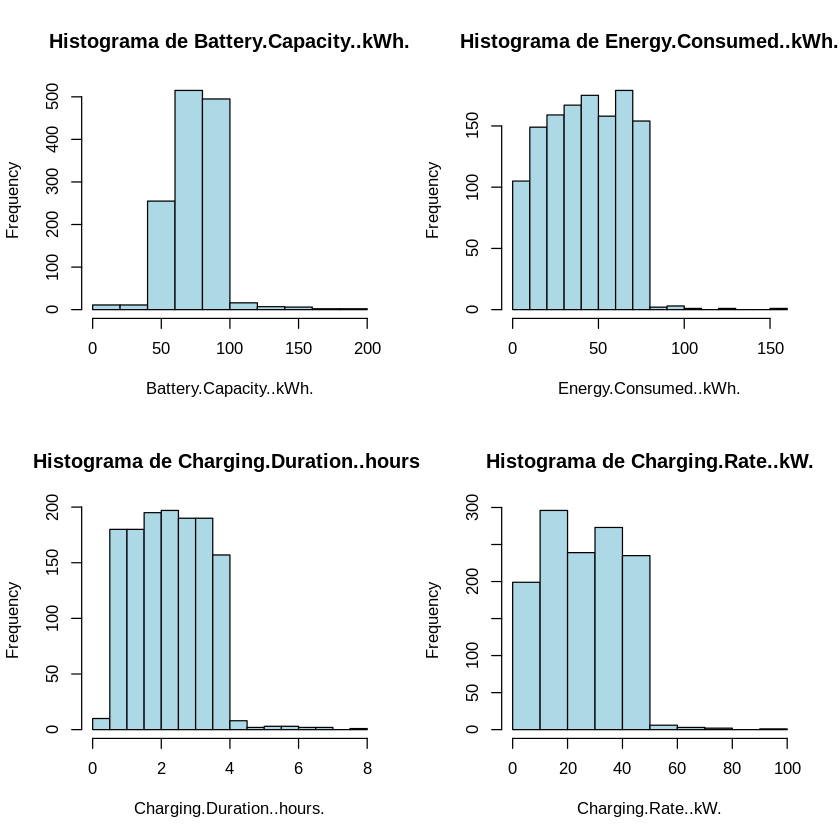

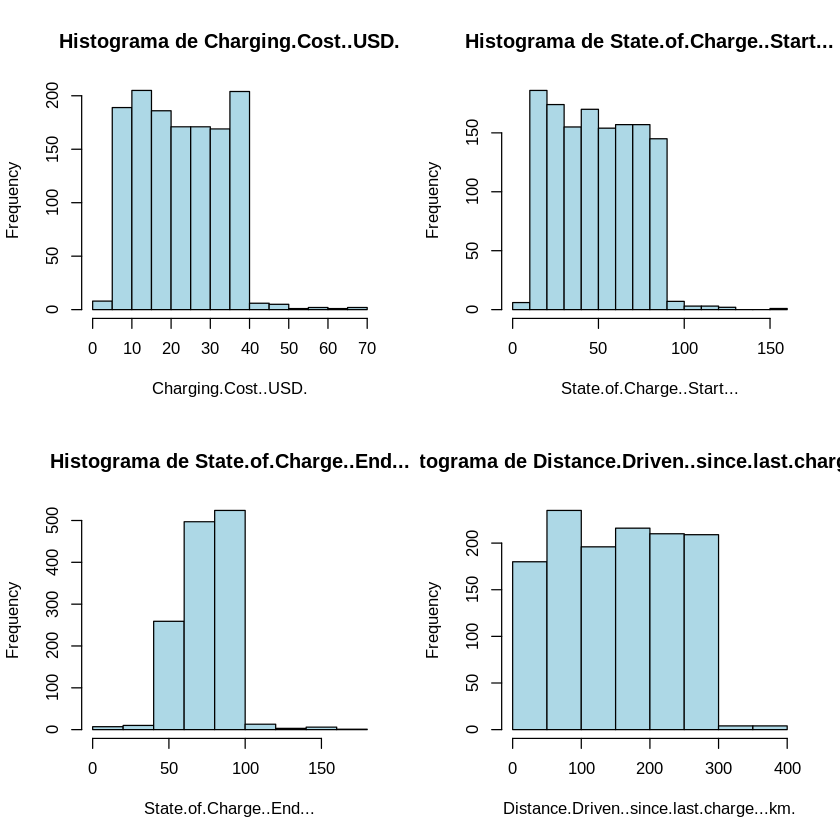

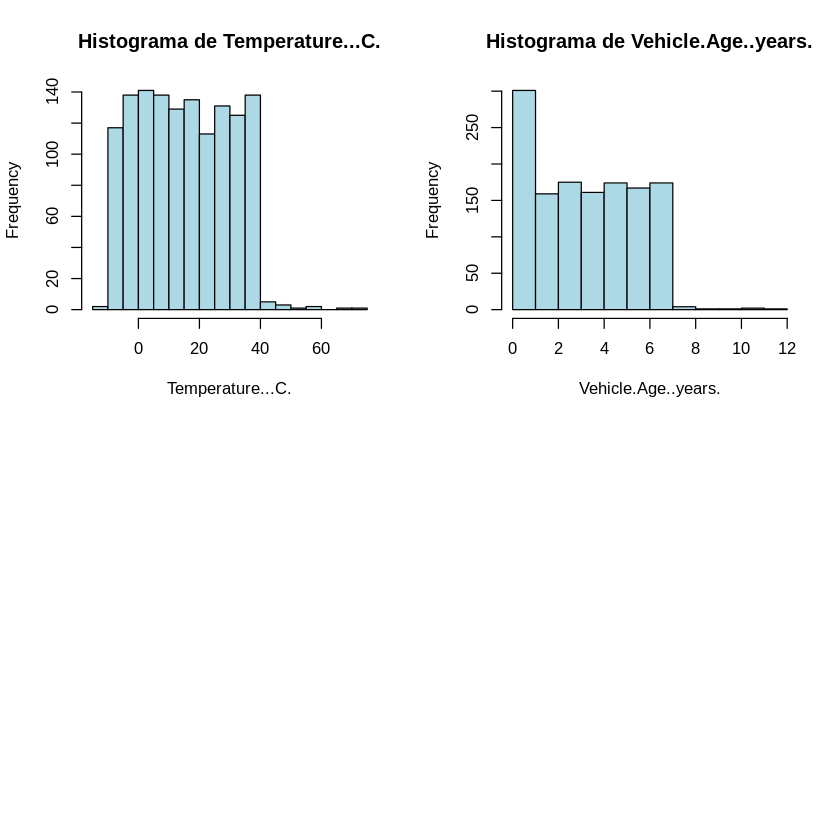

In [7]:
# Seleccionar solo las columnas numéricas
numericas <- datos[sapply(datos, is.numeric)]

# Graficar histogramas para cada variable numérica
par(mfrow = c(2, 2))  # Dividir la ventana gráfica en una cuadrícula de 2x2
for (col in colnames(numericas)) {
  hist(numericas[[col]], main = paste("Histograma de", col), xlab = col, col = "lightblue", border = "black")
}
par(mfrow = c(1, 1))  # Restablecer la ventana gráfica a una sola trama


**Identificar y manejar valores faltantes**

In [8]:
sum(is.na(datos))          # Total de valores NA
colSums(is.na(datos))      # Valores NA por columna


[1] 198

User.ID 
                                       0 
                           Vehicle.Model 
                                       0 
                  Battery.Capacity..kWh. 
                                       0 
                     Charging.Station.ID 
                                       0 
               Charging.Station.Location 
                                       0 
                     Charging.Start.Time 
                                       0 
                       Charging.End.Time 
                                       0 
                   Energy.Consumed..kWh. 
                                      66 
               Charging.Duration..hours. 
                                       0 
                      Charging.Rate..kW. 
                                      66 
                     Charging.Cost..USD. 
                                       0 
                             Time.of.Day 
                                       0 
                             Day.of.Week 
                                       0 
               State.of.Charge..Start... 
                                       0 
                 State.of.Charge..End... 
                                       0 
Distance.Driven..since.last.charge...km. 
                                      66 
                        Temperature...C. 
                                       0 
                     Vehicle.Age..years. 
                                       0 
                            Charger.Type 
                                       0 
                               User.Type 
                                       0

In [10]:
install.packages("naniar")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘norm’, ‘visdat’, ‘UpSetR’




In [11]:
library(naniar)


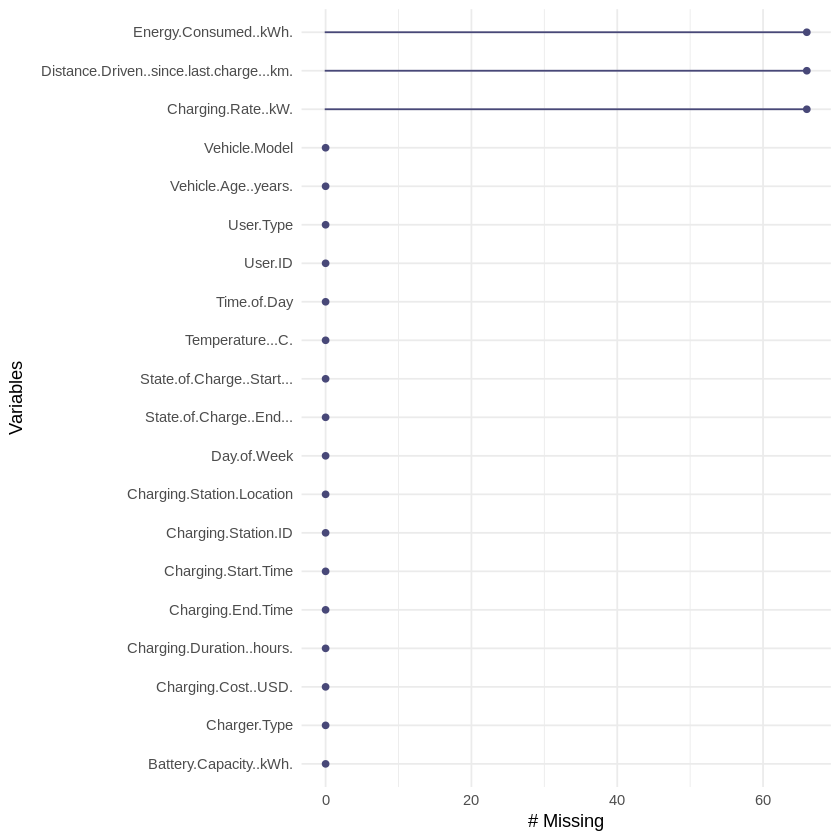

In [12]:
gg_miss_var(datos)  # Gráfico que muestra cuántos valores faltan por variable


El gráfico muestra que las variables Energy.Consumed_kWh, Distance.Driven_since.last.charge_km, y Charging.Rate_kW tienen un número significativo de valores faltantes (aproximadamente 60), mientras que la mayoría de las otras variables están completas o tienen pocos datos faltantes. Esto sugiere que será necesario decidir entre imputar o descartar los datos faltantes en estas variables clave según su relevancia para el análisis.

Como no conozco la naturaleza de la sobservaciones se decide imputa.

In [14]:
# Imputar valores faltantes con la media
for (col in names(datos)) {
  if (is.numeric(datos[[col]])) {
    datos[[col]][is.na(datos[[col]])] <- mean(datos[[col]], na.rm = TRUE)
  }
}


In [15]:
colSums(is.na(datos))


User.ID 
                                       0 
                           Vehicle.Model 
                                       0 
                  Battery.Capacity..kWh. 
                                       0 
                     Charging.Station.ID 
                                       0 
               Charging.Station.Location 
                                       0 
                     Charging.Start.Time 
                                       0 
                       Charging.End.Time 
                                       0 
                   Energy.Consumed..kWh. 
                                       0 
               Charging.Duration..hours. 
                                       0 
                      Charging.Rate..kW. 
                                       0 
                     Charging.Cost..USD. 
                                       0 
                             Time.of.Day 
                                       0 
                             Day.of.Week 
                                       0 
               State.of.Charge..Start... 
                                       0 
                 State.of.Charge..End... 
                                       0 
Distance.Driven..since.last.charge...km. 
                                       0 
                        Temperature...C. 
                                       0 
                     Vehicle.Age..years. 
                                       0 
                            Charger.Type 
                                       0 
                               User.Type 
                                       0

El resultado muestra que ya no hay valores faltantes en ninguna de las columnas después de realizar la imputación

**Detectar y manejar valores atípicos univariados y multivariados**

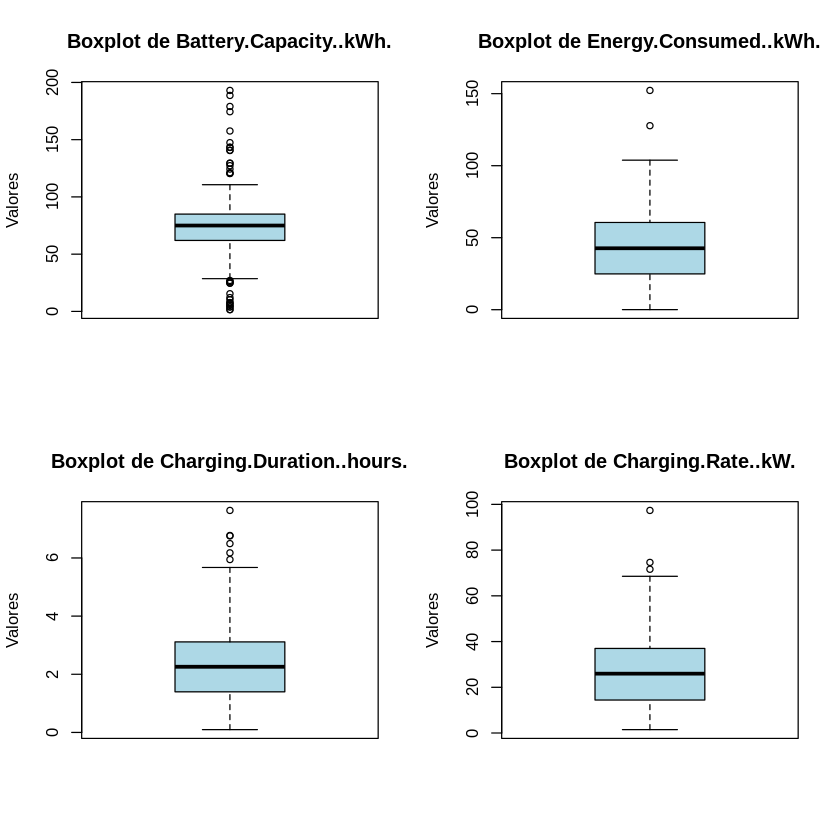

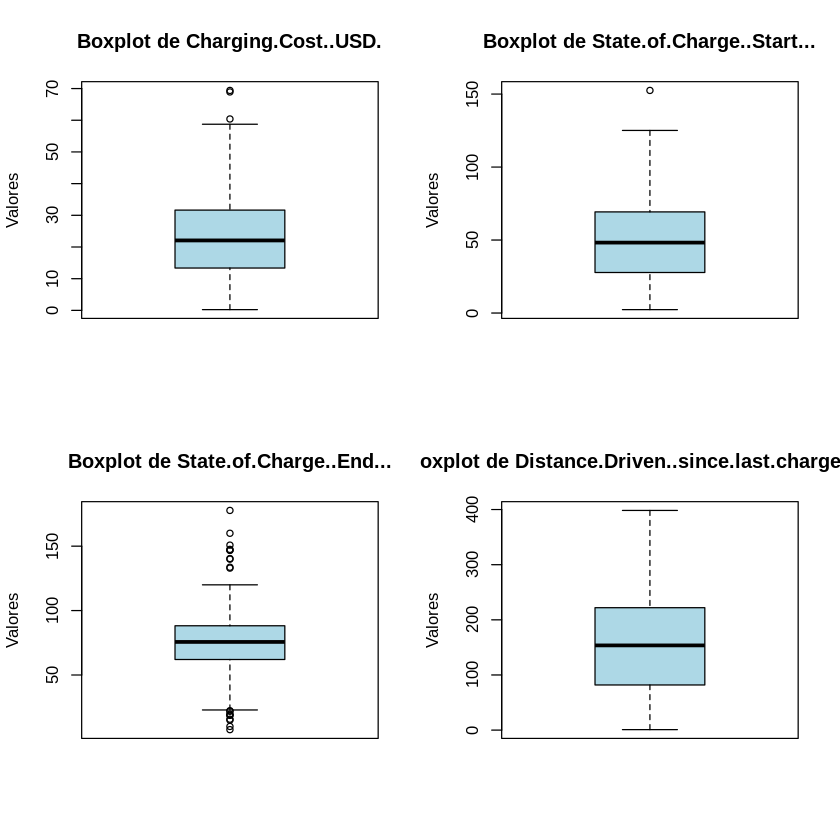

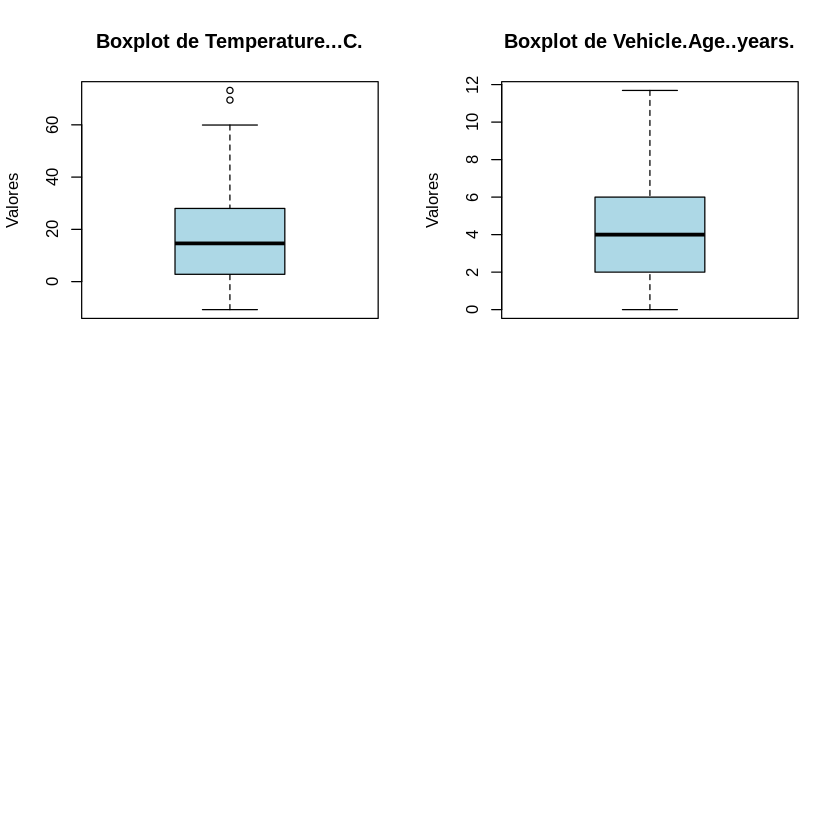

In [17]:
numericas <- datos[sapply(datos, is.numeric)]  # Filtrar variables numéricas
par(mfrow = c(2, 2))  # Configurar una cuadrícula de gráficos
for (col in colnames(numericas)) {
  boxplot(numericas[[col]], main = paste("Boxplot de", col), ylab = "Valores", col = "lightblue")
}
par(mfrow = c(1, 1))  # Restablecer la configuración de gráficos


In [18]:
# Seleccionar solo las columnas numéricas
numericas <- datos[sapply(datos, is.numeric)]

# Función para eliminar valores atípicos utilizando el IQR
eliminar_outliers <- function(x) {
  q1 <- quantile(x, 0.25, na.rm = TRUE)
  q3 <- quantile(x, 0.75, na.rm = TRUE)
  iqr <- q3 - q1
  limite_inferior <- q1 - 1.5 * iqr
  limite_superior <- q3 + 1.5 * iqr
  x[x >= limite_inferior & x <= limite_superior]  # Mantener valores dentro de los límites
}

# Aplicar la función a cada columna numérica
numericas_sin_outliers <- as.data.frame(lapply(numericas, eliminar_outliers))

# Reemplazar las columnas numéricas originales en el dataset
datos[sapply(datos, is.numeric)] <- numericas_sin_outliers

# Verificar el resultado
str(datos)


ERROR: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 1287, 1318, 1314, 1317, 1319, 1301, 1320


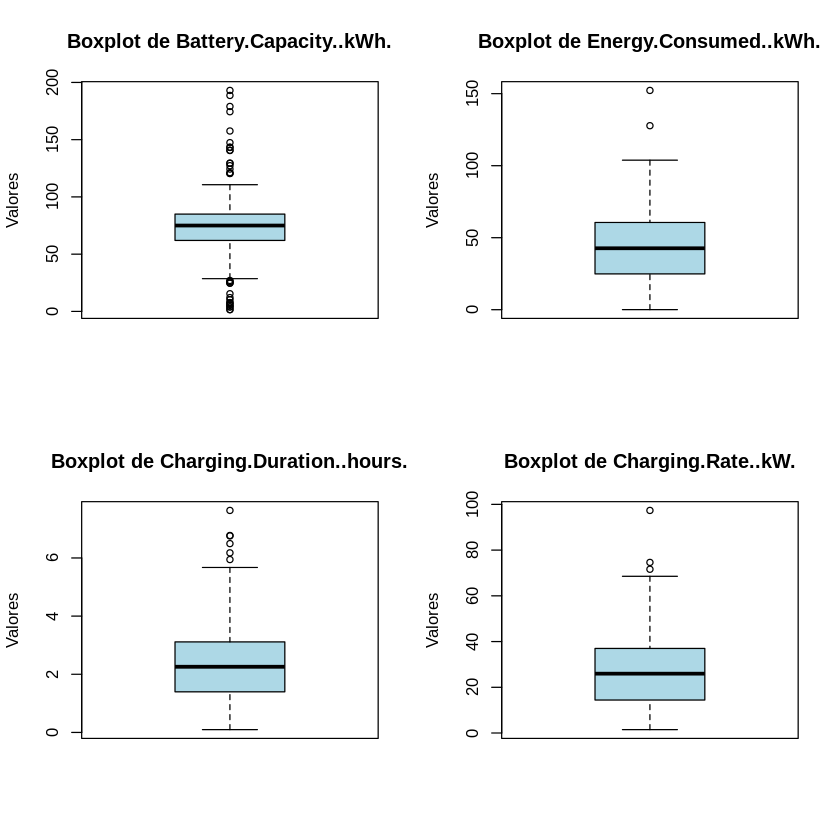

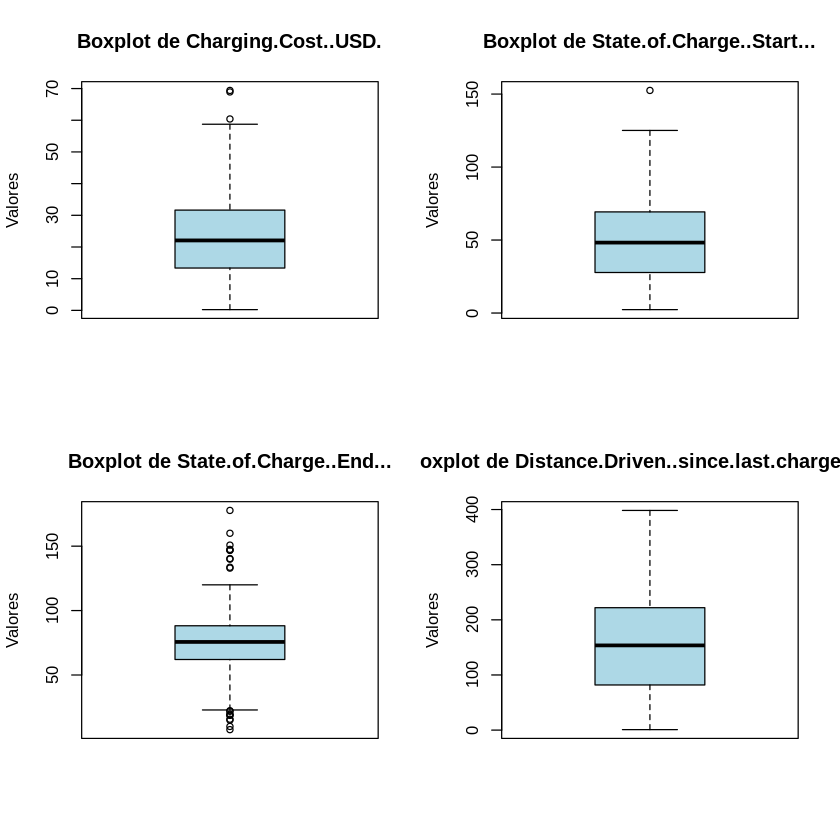

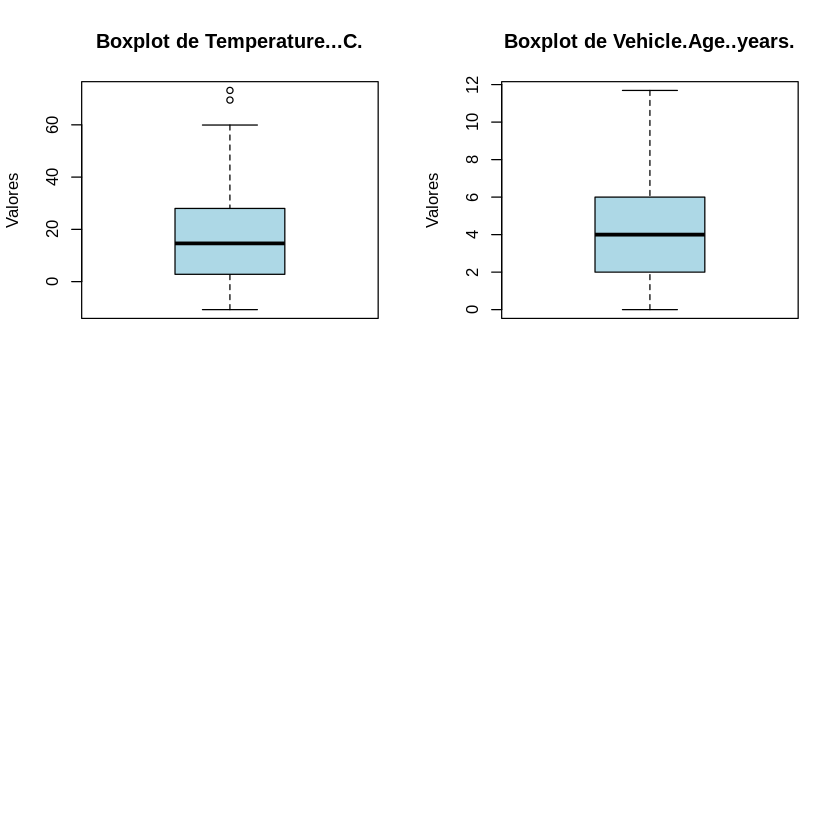

In [19]:
# Seleccionar solo las columnas numéricas
numericas_actualizadas <- datos[sapply(datos, is.numeric)]

# Configurar una cuadrícula de gráficos para visualizar varios boxplots
par(mfrow = c(2, 2))  # Dividir la ventana gráfica en una cuadrícula de 2x2
for (col in colnames(numericas_actualizadas)) {
  boxplot(numericas_actualizadas[[col]],
          main = paste("Boxplot de", col),
          ylab = "Valores",
          col = "lightblue",
          outline = TRUE)  # Para ver si aún hay atípicos
}
par(mfrow = c(1, 1))  # Restablecer la configuración gráfica


todavía aparecen puntos fuera del rango, podría ser porque los datos no seguían una distribución normal o porque algunos valores no fueron considerados atípicos según el criterio del IQR.

**Normalización/Escalamiento de Variables**

In [20]:
# Normalizar las columnas numéricas
numericas_normalizadas <- as.data.frame(scale(datos[sapply(datos, is.numeric)]))

# Reemplazar las variables normalizadas en el dataset original
datos[sapply(datos, is.numeric)] <- numericas_normalizadas

# Verificar el resultado
summary(datos[sapply(datos, is.numeric)])  # Revisar las estadísticas de las variables normalizadas


 Battery.Capacity..kWh. Energy.Consumed..kWh. Charging.Duration..hours.
 Min.   :-3.53916       Min.   :-1.9501       Min.   :-2.0490          
 1st Qu.:-0.60769       1st Qu.:-0.8137       1st Qu.:-0.8216          
 Median : 0.02256       Median : 0.0000       Median :-0.0106          
 Mean   : 0.00000       Mean   : 0.0000       Mean   : 0.0000          
 3rd Qu.: 0.50736       3rd Qu.: 0.8196       3rd Qu.: 0.7949          
 Max.   : 5.74339       Max.   : 5.0173       Max.   : 5.0571          
 Charging.Rate..kW. Charging.Cost..USD. State.of.Charge..Start...
 Min.   :-1.7933    Min.   :-2.07572    Min.   :-1.9442          
 1st Qu.:-0.8444    1st Qu.:-0.85413    1st Qu.:-0.8866          
 Median : 0.0000    Median :-0.04418    Median :-0.0369          
 Mean   : 0.0000    Mean   : 0.00000    Mean   : 0.0000          
 3rd Qu.: 0.8050    3rd Qu.: 0.84590    3rd Qu.: 0.8369          
 Max.   : 5.2268    Max.   : 4.35813    Max.   : 4.2934          
 State.of.Charge..End... Distance.

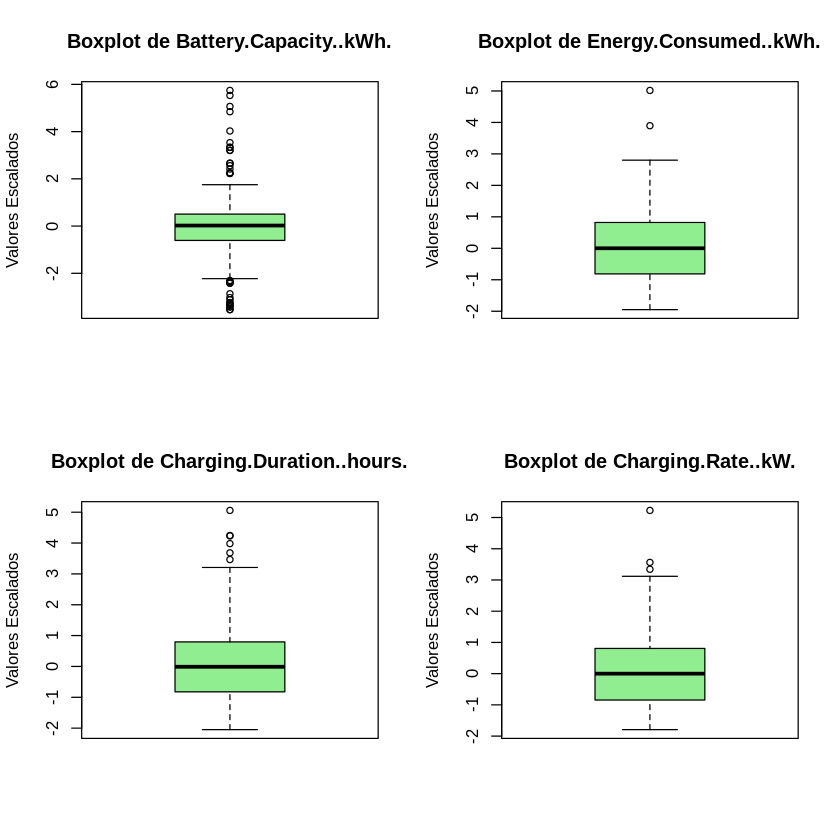

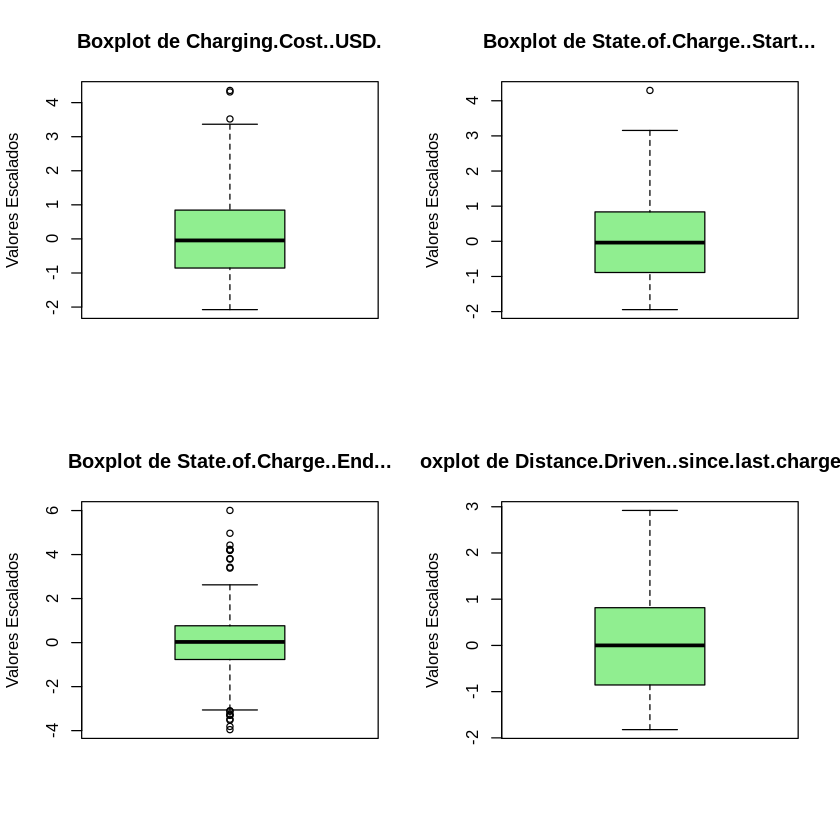

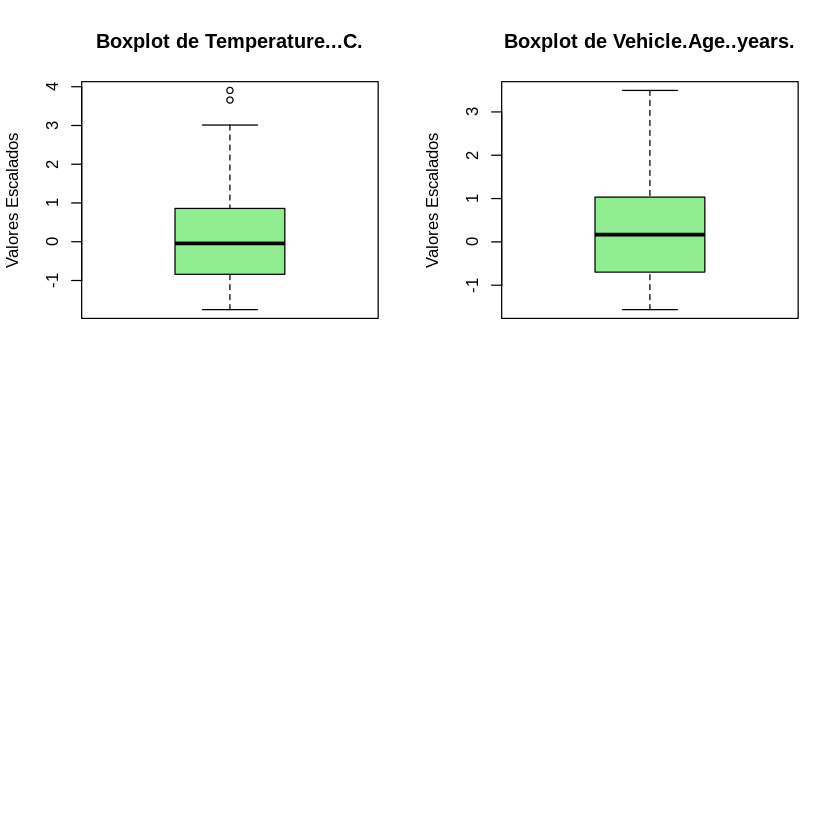

In [21]:
par(mfrow = c(2, 2))  # Configurar una cuadrícula de gráficos
for (col in colnames(numericas_normalizadas)) {
  boxplot(numericas_normalizadas[[col]], main = paste("Boxplot de", col), ylab = "Valores Escalados", col = "lightgreen")
}
par(mfrow = c(1, 1))  # Restablecer la configuración gráfica


Los boxplots muestran que todavía hay valores atípicos presentes en algunas variables, como Battery.Capacity..kWh., Charging.Duration..hours., y otras. Esto puede deberse a varias razones: Criterio del IQR insuficiente: El método del rango intercuartílico (IQR) puede no eliminar todos los valores extremos si la distribución tiene colas largas o no es normal.

**Distribuciones y calcular la curtosis**

Loading required package: moments

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘moments’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



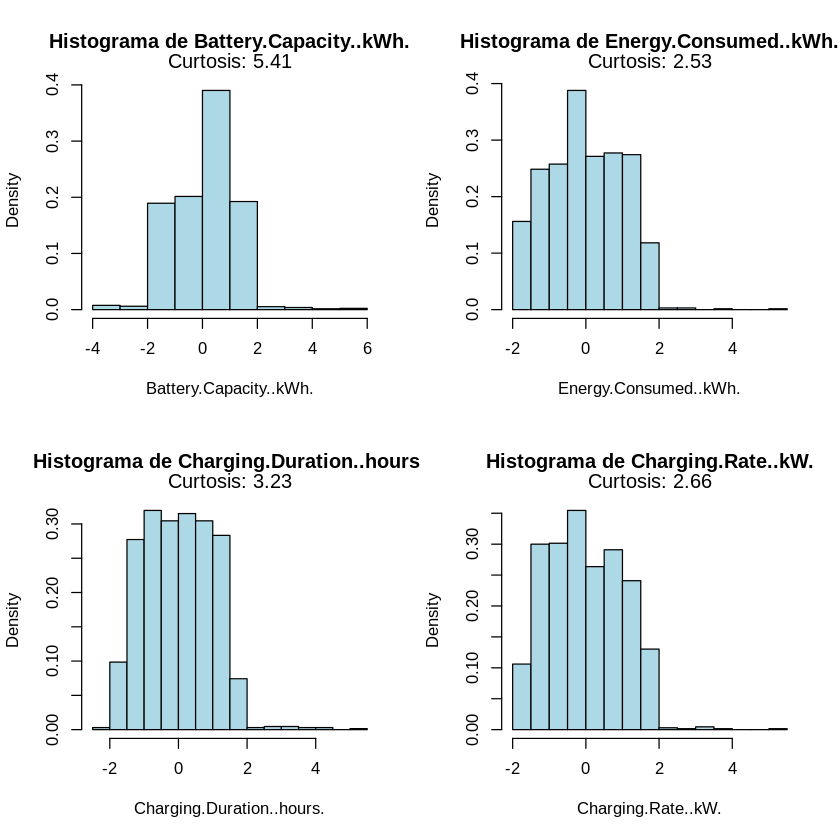

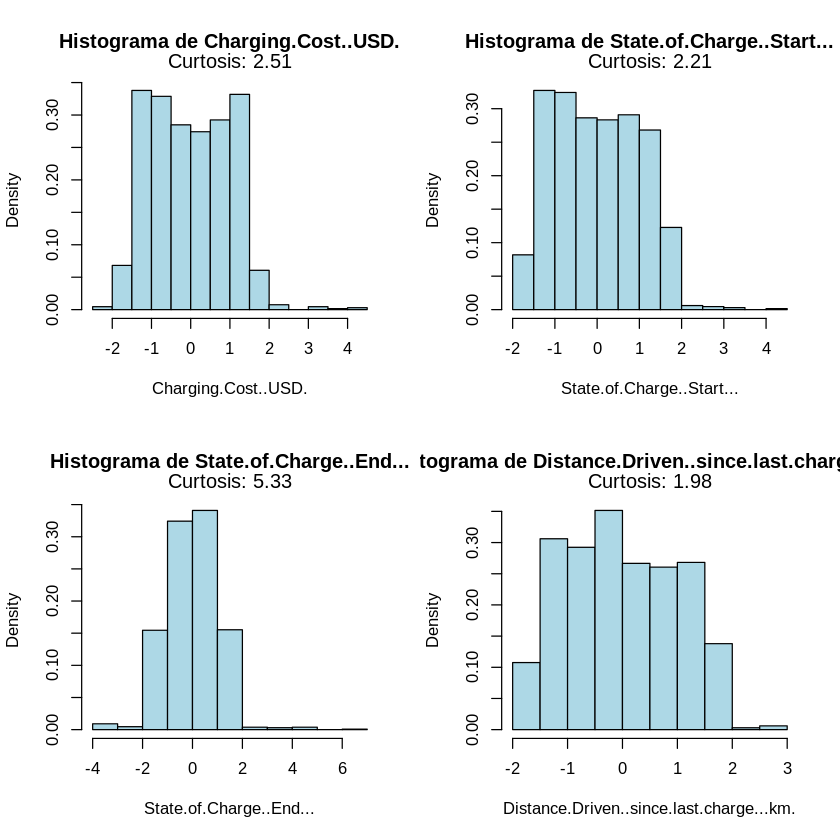

                  Battery.Capacity..kWh. 
                                5.409597 
                   Energy.Consumed..kWh. 
                                2.534034 
               Charging.Duration..hours. 
                                3.234185 
                      Charging.Rate..kW. 
                                2.664133 
                     Charging.Cost..USD. 
                                2.509956 
               State.of.Charge..Start... 
                                2.214051 
                 State.of.Charge..End... 
                                5.330495 
Distance.Driven..since.last.charge...km. 
                                1.976760 
                        Temperature...C. 
                                2.132085 
                     Vehicle.Age..years. 
                                1.954588 


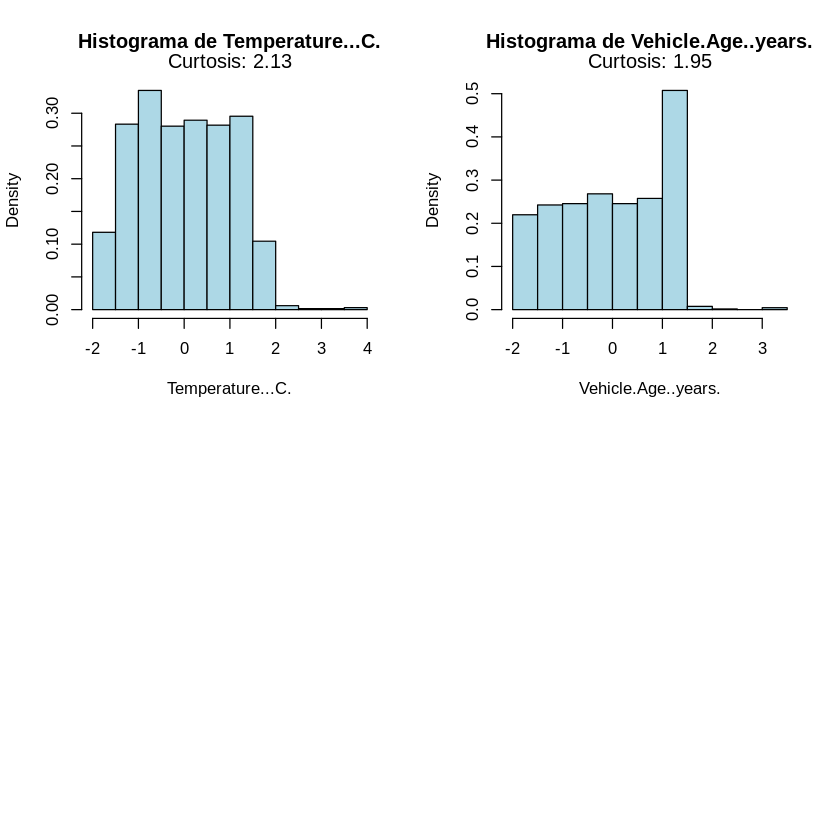

In [22]:
# Instalar librería necesaria si no está instalada
if (!require(moments)) install.packages("moments")
library(moments)

# Seleccionar solo las columnas numéricas
numericas <- datos[sapply(datos, is.numeric)]

# Crear una cuadrícula para graficar
par(mfrow = c(2, 2))  # Dividir la ventana gráfica en 2x2

# Iterar sobre cada variable numérica
for (col in colnames(numericas)) {
  # Graficar histograma
  hist(numericas[[col]],
       main = paste("Histograma de", col),
       xlab = col,
       col = "lightblue",
       border = "black",
       probability = TRUE)

  # Calcular y agregar la curtosis al título
  curt <- kurtosis(numericas[[col]], na.rm = TRUE)
  mtext(paste("Curtosis:", round(curt, 2)), side = 3, line = 0.5)
}

# Restablecer la configuración gráfica
par(mfrow = c(1, 1))

# Mostrar las curtosis de todas las variables
curtosis_valores <- sapply(numericas, function(x) kurtosis(x, na.rm = TRUE))
print(curtosis_valores)


**Evaluar normalidad**

In [23]:
# Crear una función para evaluar normalidad
evaluar_normalidad <- function(x) {
  if (length(x) > 5000) {
    x <- sample(x, 5000)  # Shapiro-Wilk no soporta muestras mayores a 5000
  }
  prueba <- shapiro.test(x)
  c(Estadístico = round(prueba$statistic, 4), P_valor = round(prueba$p.value, 4))
}

# Aplicar la función a todas las variables numéricas
numericas <- datos[sapply(datos, is.numeric)]
resultados <- t(sapply(numericas, evaluar_normalidad))

# Agregar columna para indicar si es normal o no
resultados <- as.data.frame(resultados)
resultados$Normalidad <- ifelse(resultados$P_valor > 0.05, "Normal", "No Normal")

# Mostrar la tabla final
print(resultados)


                                         Estadístico.W P_valor Normalidad
Battery.Capacity..kWh.                          0.9247       0  No Normal
Energy.Consumed..kWh.                           0.9689       0  No Normal
Charging.Duration..hours.                       0.9668       0  No Normal
Charging.Rate..kW.                              0.9672       0  No Normal
Charging.Cost..USD.                             0.9605       0  No Normal
State.of.Charge..Start...                       0.9634       0  No Normal
State.of.Charge..End...                         0.9557       0  No Normal
Distance.Driven..since.last.charge...km.        0.9658       0  No Normal
Temperature...C.                                0.9625       0  No Normal
Vehicle.Age..years.                             0.9384       0  No Normal


**Observación:** El resultado muestra que todas las variables evaluadas tienen un p-valor de 0, lo que significa que no pasan la prueba de Shapiro-Wilk para normalidad. Esto indica que ninguna de las variables sigue una distribución normal.